## **Import all needed packages**

In [1]:
import os
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from google.colab import files
from scipy.stats import ks_2samp
from matplotlib import pyplot as plt
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers, models, regularizers
from sklearn.metrics import confusion_matrix, accuracy_score
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split

# **Load the Data**

- Load the CSV file using Panda's `pd.read_csv()`.
- Inspect the data using `df.head()` to show the first 10 rows of the data set.





In [2]:
#Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

#Load the dataset
file_path = '/content/drive/My Drive/AcademicSuccess.csv'
df = pd.read_csv(file_path)

# Display part of the dataset
df.head(10)


Mounted at /content/drive


,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
5,2,12,1,17,0,12,1,22,27,10,...,0,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate
6,1,1,1,12,1,1,1,13,28,8,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate
7,1,9,4,11,1,1,1,22,27,10,...,0,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout
8,1,1,3,10,1,1,15,1,1,10,...,0,6,7,6,14.142857,0,16.2,0.3,-0.92,Graduate
9,1,1,1,10,1,1,1,1,14,5,...,0,6,14,2,13.500000,0,8.9,1.4,3.51,Dropout


# **Display the data types**

Show the data types with `df.dtypes.`

In [3]:
# Check for the data types of each column
print("\nData types of each column:")
print(df.dtypes)


Data types of each column:
Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance                          int64
Previous qualification                              int64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender                                              int64
Scholarship holder                          

# **# Data summary**

Full summary of the dataset using `df.info().`

In [4]:
# Data set full summary
print("\nSummary of the dataset:")
print(df.info())


Summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupat

In [5]:
#Data summary
print(df.describe())

       Marital status  Application mode  Application order       Course  \
count     4424.000000       4424.000000        4424.000000  4424.000000   
mean         1.178571          6.886980           1.727848     9.899186   
std          0.605747          5.298964           1.313793     4.331792   
min          1.000000          1.000000           0.000000     1.000000   
25%          1.000000          1.000000           1.000000     6.000000   
50%          1.000000          8.000000           1.000000    10.000000   
75%          1.000000         12.000000           2.000000    13.000000   
max          6.000000         18.000000           9.000000    17.000000   

       Daytime/evening attendance  Previous qualification  Nacionality  \
count                 4424.000000             4424.000000  4424.000000   
mean                     0.890823                2.531420     1.254521   
std                      0.311897                3.963707     1.748447   
min                      0.0

In [6]:
#check if there are missing values
print(df.isnull().sum())

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

# **Correlation Map**

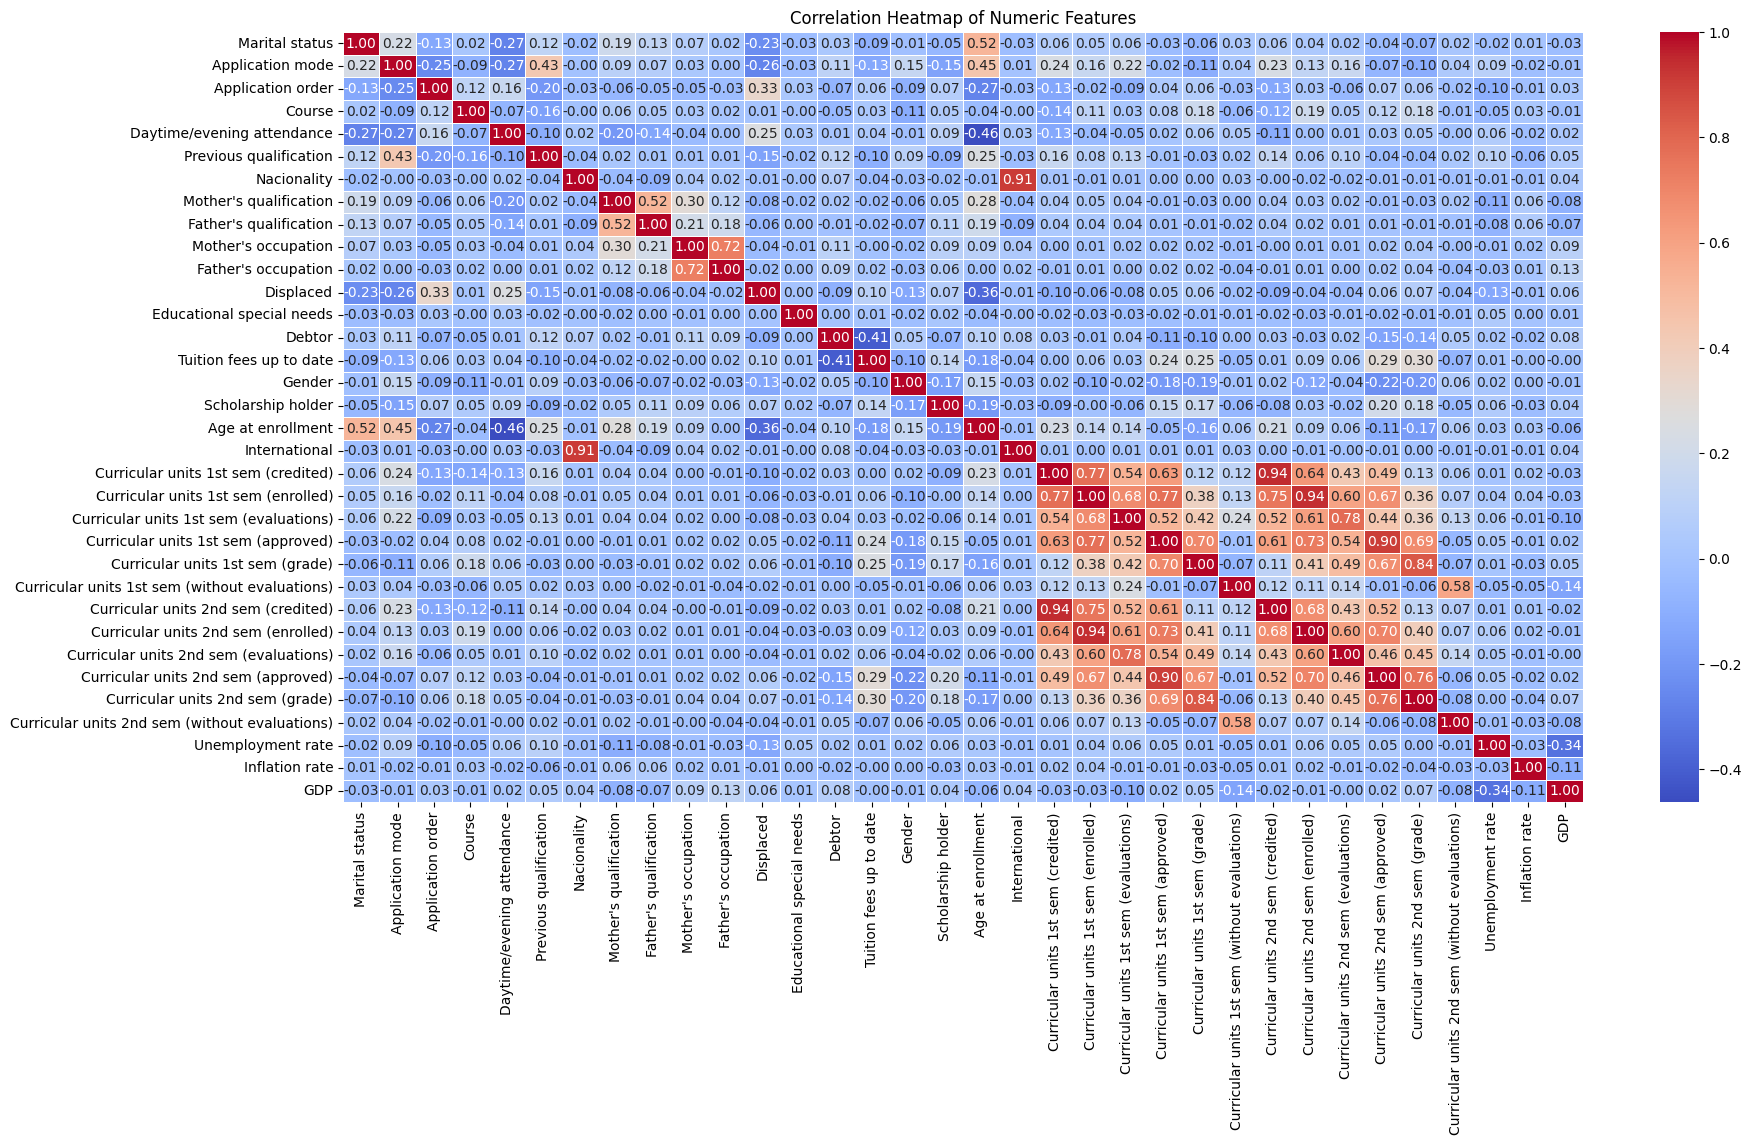

In [42]:
# Visualize the heatmap for features and target correlations
numeric_data = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


# **Understanding the `Target`**

In [16]:
df['Target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [17]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

In [18]:
numerical = [ 'Age at enrollment',
'Unemployment rate',
'Previous qualification',
'Inflation rate',
'GDP',
'Curricular units 1st sem (approved)',
'Curricular units 2nd sem (approved)',
'Curricular units 1st sem (grade)',
'Curricular units 2nd sem (grade)',
'Curricular units 1st sem (evaluations)',
'Curricular units 2nd sem (evaluations)',
'Curricular units 1st sem (enrolled)',
'Curricular units 2nd sem (enrolled)']

Age at enrollment


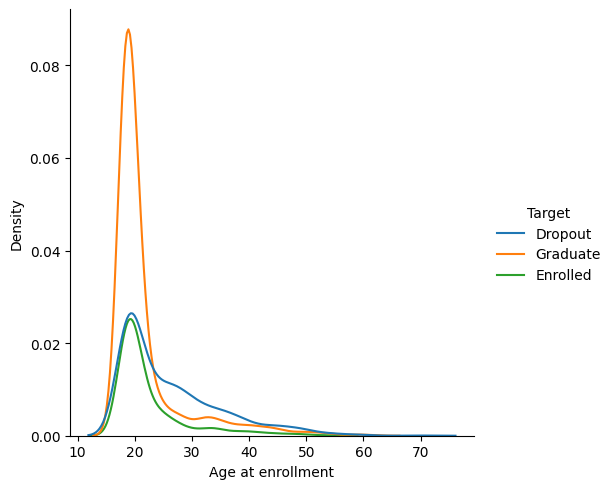

Unemployment rate


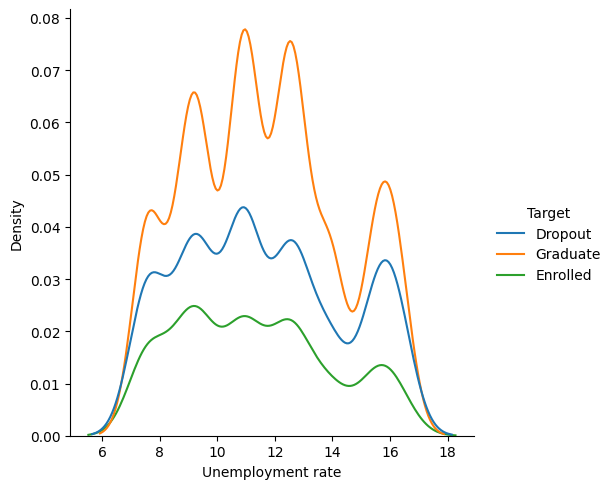

Previous qualification


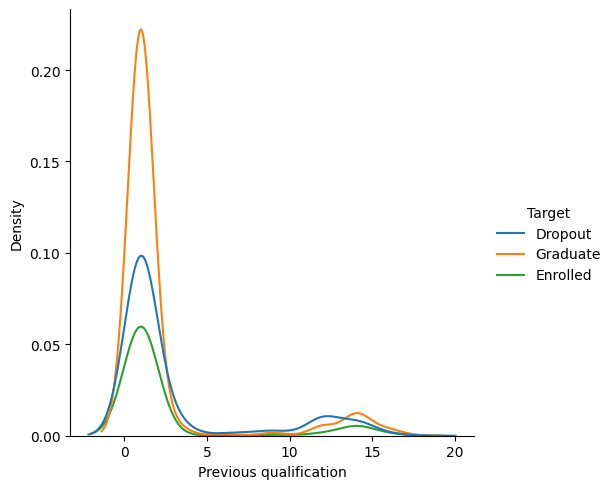

Inflation rate


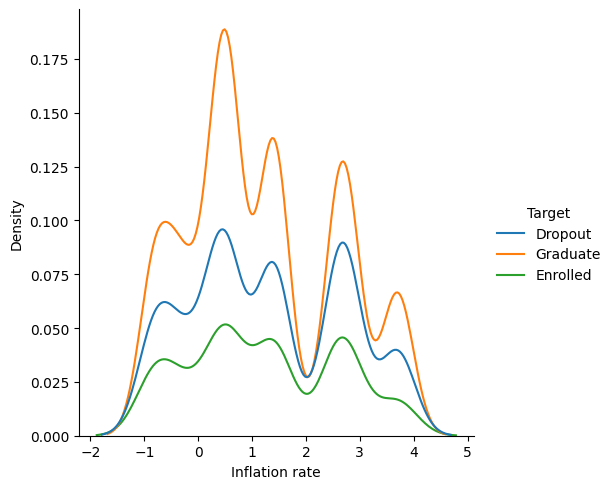

GDP


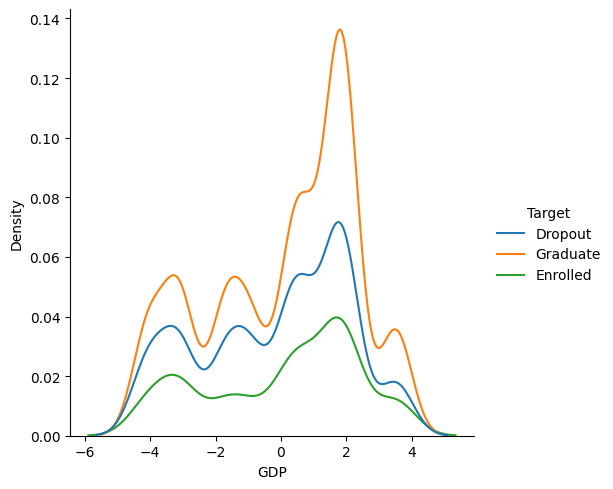

Curricular units 1st sem (approved)


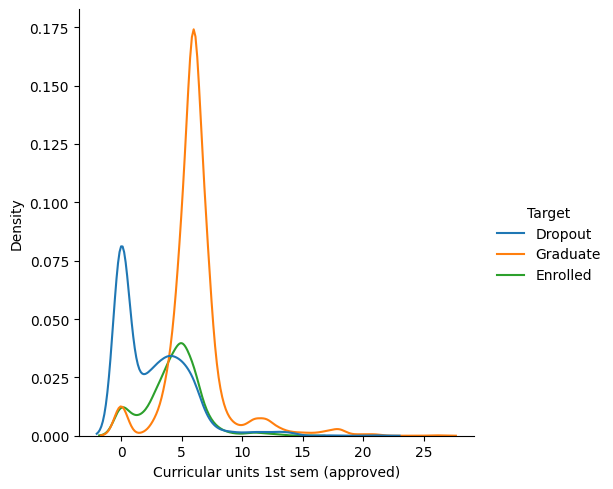

Curricular units 2nd sem (approved)


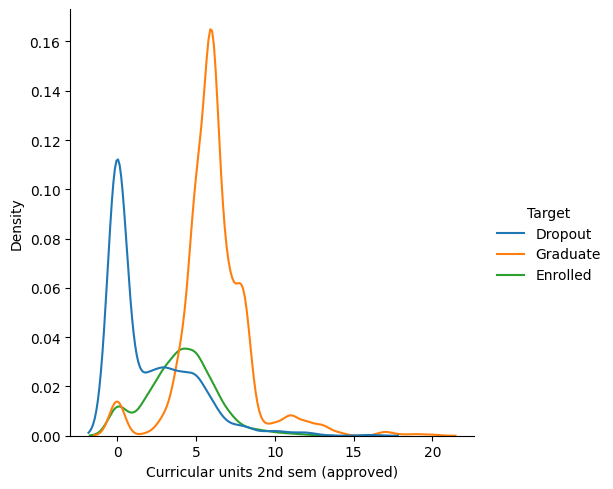

Curricular units 1st sem (grade)


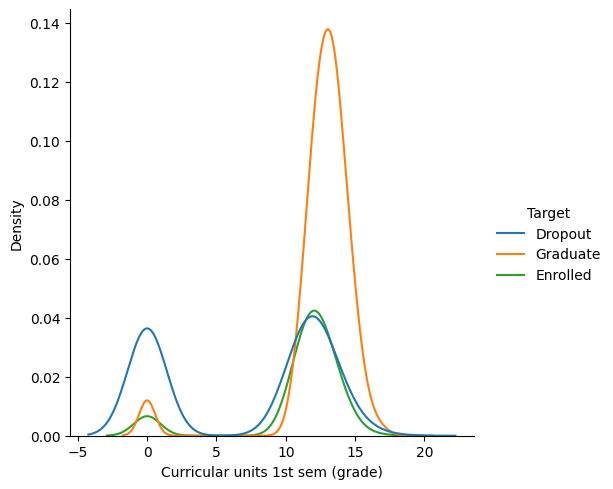

Curricular units 2nd sem (grade)


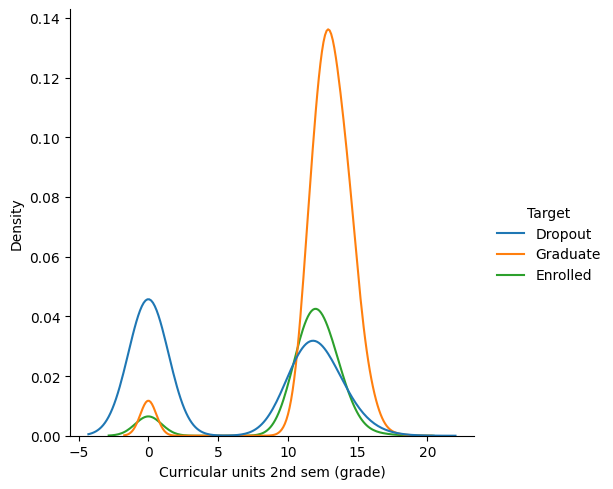

Curricular units 1st sem (evaluations)


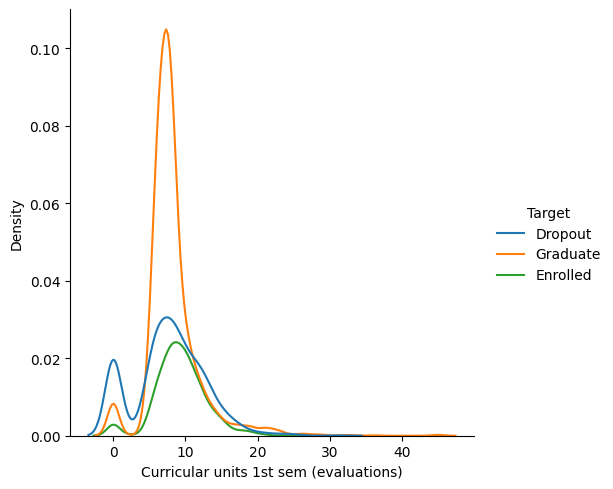

Curricular units 2nd sem (evaluations)


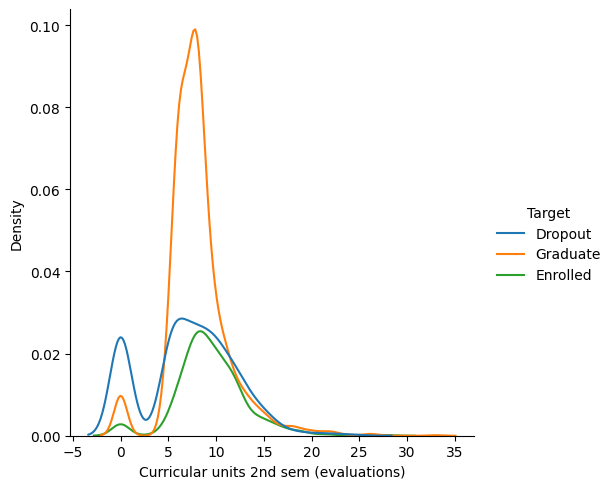

Curricular units 1st sem (enrolled)


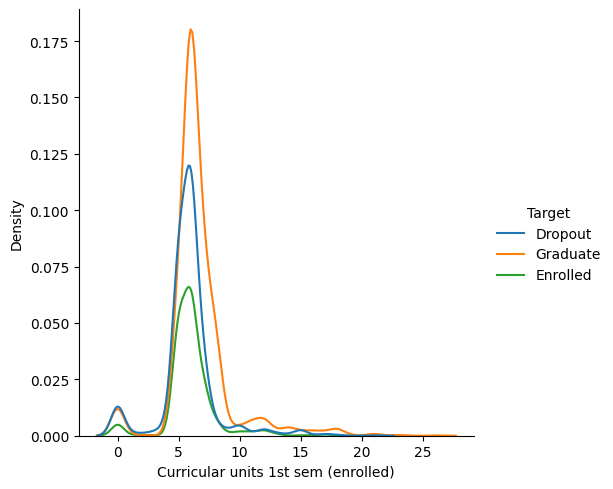

Curricular units 2nd sem (enrolled)


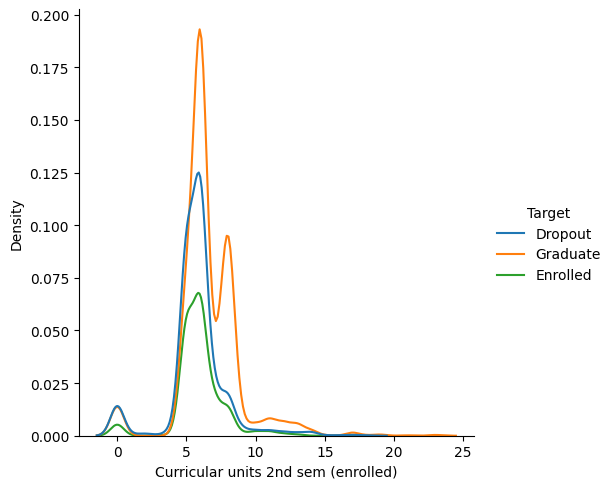

In [20]:
# exploring the numerical feaures
for feature in numerical:
    print(f'{feature}')
    sns.displot(data=df, x=feature, hue= 'Target', kind="kde")
    plt.show()

Data Handling and Preprocessing

In [44]:
#Feature Selection
X=df.drop('Gender', axis=1)
y=df['Gender']

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# One-Hot Encode categorical variables
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

#Split data into train and test
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

#Standardize the data
scaler= MinMaxScaler()
X_train_Scaled= scaler.fit_transform(X_train)
X_test_Scaled= scaler.transform(X_test)

In [33]:
X_train_Scaled.shape

(3539, 35)

In [35]:
X_test_Scaled.shape

(885, 35)

# **Vanilla model training without optimizers**

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6416 - loss: 0.6536 - val_accuracy: 0.6638 - val_loss: 0.6151
Epoch 2/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6636 - loss: 0.6133 - val_accuracy: 0.6653 - val_loss: 0.6210
Epoch 3/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6857 - loss: 0.6024 - val_accuracy: 0.6412 - val_loss: 0.6282
Epoch 4/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6668 - loss: 0.6086 - val_accuracy: 0.6667 - val_loss: 0.6021
Epoch 5/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6868 - loss: 0.5931 - val_accuracy: 0.6737 - val_loss: 0.6650
Epoch 6/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6610 - loss: 0.6164 - val_accuracy: 0.6638 - val_loss: 0.6106
Epoch 7/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6760 - loss: 0.6041 - val_accuracy: 0.6695 - val_loss: 0.6030
Epoch 8/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6997 - loss: 0.5740 - val_accuracy: 0.6681 - val_loss: 0.6

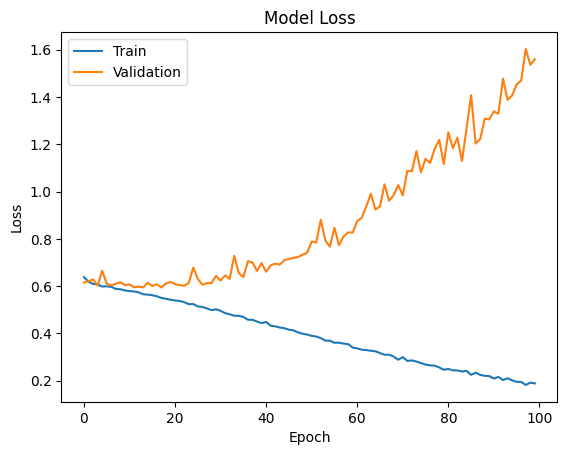

In [92]:
# initialize the sequential model
vanilla=Sequential()

# Input layer
vanilla.add(Dense(64, activation='relu', input_dim=X_train_Scaled.shape[1]))

# Hidden layers
vanilla.add(Dense(64, activation='relu'))
vanilla.add(Dense(32, activation='relu'))
vanilla.add(Dense(16, activation='relu'))

# Output layer
vanilla.add(Dense(1, activation='sigmoid'))

#Compile the model
vanilla.compile(loss='binary_crossentropy', metrics=['accuracy'])

# The early stopping
# early_stopping= EarlyStopping(monitor='val_loss', restore_best_weights=True, verbose=1, patience=5)

# Train the model
history = vanilla.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=1)

# Evaluate the model on the test set
test_loss, test_accuracy = vanilla.evaluate(X_test, y_test)

print("\n ---------------------------------------- \n")
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [65]:
# Save the vanilla model
vanilla.save('Vanilla.keras')

# **Vanilla model Error Analysis**

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Confusion Matrix:
[[568  21]
 [248  48]]

Vanilla Model Performance Metrics:
Accuracy: 0.6960
Precision: 0.6957
Recall (Sensitivity): 0.1622
Specificity: 0.9643
F1 Score: 0.2630


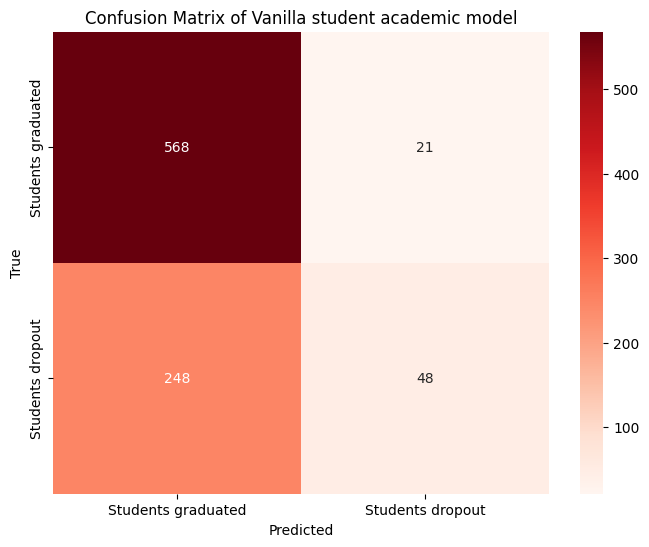

In [93]:
# Make predictions on the test set
y_pred_prob = vanilla.predict(X_test_Scaled)

# Convert probabilities to binary predictions (threshold > 0.5)
y_pred = (y_pred_prob > 0.5).astype(int)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

#Calculate additional metrics: Accuracy, Precision, Recall, F1 Score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Sensitivity and Specificity
sensitivity = recall  # Recall is the same as sensitivity for binary classification
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])  # TN / (TN + FP)

# Print the calculated metrics
print(f"\nVanilla Model Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion Matrix Plot
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds',
            xticklabels=['Students graduated', 'Students dropout'], yticklabels=['Students graduated', 'Students dropout'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of Vanilla student academic model')
plt.show()

# **L1 Regularization with Adam Optimizer**

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 - 4s - 96ms/step - accuracy: 0.5977 - loss: 0.9072 - val_accuracy: 0.6412 - val_loss: 0.7693
Epoch 2/100
45/45 - 1s - 13ms/step - accuracy: 0.6330 - loss: 0.7448 - val_accuracy: 0.6398 - val_loss: 0.7494
Epoch 3/100
45/45 - 1s - 14ms/step - accuracy: 0.6401 - loss: 0.7319 - val_accuracy: 0.6596 - val_loss: 0.7287
Epoch 4/100
45/45 - 0s - 6ms/step - accuracy: 0.6489 - loss: 0.7207 - val_accuracy: 0.6653 - val_loss: 0.7116
Epoch 5/100
45/45 - 0s - 7ms/step - accuracy: 0.6425 - loss: 0.7176 - val_accuracy: 0.6596 - val_loss: 0.7132
Epoch 6/100
45/45 - 0s - 8ms/step - accuracy: 0.6588 - loss: 0.7053 - val_accuracy: 0.6836 - val_loss: 0.7153
Epoch 7/100
45/45 - 1s - 14ms/step - accuracy: 0.6563 - loss: 0.7125 - val_accuracy: 0.6681 - val_loss: 0.6972
Epoch 8/100
45/45 - 1s - 11ms/step - accuracy: 0.6454 - loss: 0.7059 - val_accuracy: 0.6638 - val_loss: 0.7016
Epoch 9/100
45/45 - 1s - 19ms/step - accuracy: 0.6549 - loss: 0.6988 - val_accuracy: 0.6653 - val_loss: 0.6858
Epoch 10/100
45/

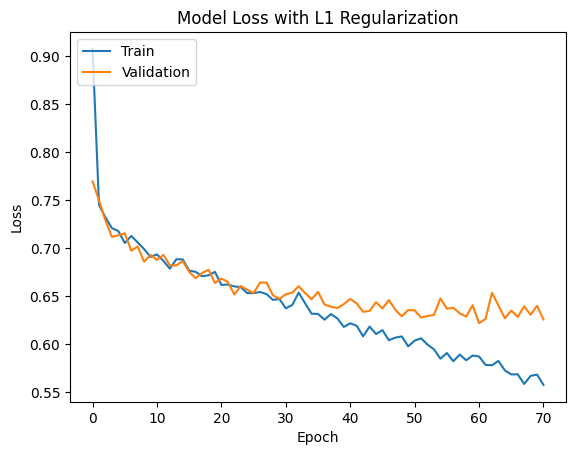

In [94]:
# Build the L1-regularized model
model_l1 = Sequential()

# Input layer
model_l1.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))

# First hidden layer with L1 regularization
model_l1.add(Dense(64, activation='relu',
                kernel_regularizer=regularizers.l1(0.0001)))
model_l1.add(Dropout(0.5))

# Second hidden layer with L1 regularization
model_l1.add(Dense(32, activation='relu',
                kernel_regularizer=regularizers.l1(0.0001)))
model_l1.add(Dropout(0.2))

# Third hidden layer with L1 regularization
model_l1.add(Dense(16, activation='relu',
                kernel_regularizer=regularizers.l1(0.0001)))
model_l1.add(Dropout(0.2))

# Output layer with 1 unit and sigmoid activation for binary classification
model_l1.add(Dense(1, activation='sigmoid'))

# Compile the model with Adam optimizer and binary cross-entropy loss
model_l1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early Stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history_l1 = model_l1.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=64,
                    callbacks=[early_stopping], verbose=2)

# Evaluate the model on the test set
test_loss_l1, test_acc_l1 = model_l1.evaluate(X_test, y_test)
print(f"\nTest Loss with L1 Regularization: {test_loss_l1}")
print(f"Test Accuracy with L1 Regularization: {test_acc_l1}")

# Plot training & validation loss values
import matplotlib.pyplot as plt

plt.plot(history_l1.history['loss'])
plt.plot(history_l1.history['val_loss'])
plt.title('Model Loss with L1 Regularization')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [98]:
# Save L1 Regularization
model_l1.save('l1_regularization_model.keras')

# **L1 Model Error Analysis**

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Confusion Matrix:
[[568  21]
 [248  48]]

L1 Model Performance Metrics:
Accuracy: 0.5548
Precision: 0.4149
Recall (Sensitivity): 0.8074
Specificity: 0.9643
F1 Score: 0.5482


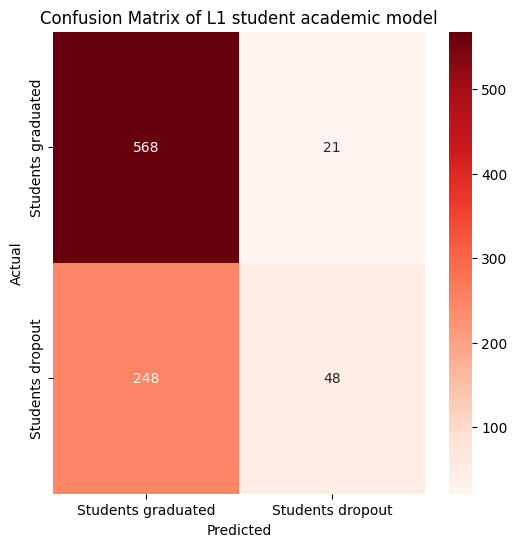

In [95]:
# Make predictions on the test set
y_pred_prob_l1 = model_l1.predict(X_test_Scaled)

# Convert probabilities to binary predictions (threshold > 0.5)
y_pred_l1 = (y_pred_prob_l1 > 0.3).astype(int)

# Confusion Matrix
conf_matrix_l1 = confusion_matrix(y_test, y_pred_l1)
print("Confusion Matrix:")
print(conf_matrix)

#Calculate additional metrics: Accuracy, Precision, Recall, F1 Score
accuracy = accuracy_score(y_test, y_pred_l1)
precision = precision_score(y_test, y_pred_l1)
recall = recall_score(y_test, y_pred_l1)
f1 = f1_score(y_test, y_pred_l1)

# Sensitivity and Specificity
sensitivity = recall  # Recall is the same as sensitivity for binary classification
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])  # TN / (TN + FP)

# Print the calculated metrics
print(f"\nL1 Model Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion Matrix Plot
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds',
            xticklabels=['Students graduated', 'Students dropout'], yticklabels=['Students graduated', 'Students dropout'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of L1 student academic model')
plt.show()

# **L2 Regularization with RMSprop Optimizer**

In [100]:
# Build the L2 Regularized Model
l2_model = Sequential()

# Input layer
l2_model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))

# Hidden layers
l2_model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
l2_model.add(Dropout(0.3))
l2_model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
l2_model.add(Dropout(0.2))
l2_model.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
l2_model.add(Dropout(0.2))

# Output layer
l2_model.add(Dense(1, activation='sigmoid'))

# Compile the model with RMSprop optimizer and binary cross-entropy loss
l2_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the L2 model
l2_history = l2_model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=64,
                          callbacks=[early_stopping], verbose=2)

# Evaluate the model on the test set and print results
# Evaluate the model on the test set
test_loss_l2, test_acc_l2 = l2_model.evaluate(X_test, y_test)
print(f"\nTest Loss with L2 Regularization: {test_loss_l2}")
print(f"Test Accuracy with L2 Regularization: {test_acc_l2}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
45/45 - 3s - 68ms/step - accuracy: 0.5846 - loss: 0.8003 - val_accuracy: 0.6624 - val_loss: 0.6502
Epoch 2/100
45/45 - 0s - 3ms/step - accuracy: 0.6302 - loss: 0.6796 - val_accuracy: 0.6441 - val_loss: 0.6586
Epoch 3/100
45/45 - 0s - 3ms/step - accuracy: 0.6298 - loss: 0.6596 - val_accuracy: 0.6638 - val_loss: 0.6343
Epoch 4/100
45/45 - 0s - 7ms/step - accuracy: 0.6485 - loss: 0.6570 - val_accuracy: 0.6568 - val_loss: 0.6579
Epoch 5/100
45/45 - 0s - 7ms/step - accuracy: 0.6609 - loss: 0.6396 - val_accuracy: 0.6638 - val_loss: 0.6268
Epoch 6/100
45/45 - 0s - 7ms/step - accuracy: 0.6549 - loss: 0.6397 - val_accuracy: 0.6737 - val_loss: 0.6254
Epoch 7/100
45/45 - 0s - 7ms/step - accuracy: 0.6545 - loss: 0.6384 - val_accuracy: 0.6723 - val_loss: 0.6248
Epoch 8/100
45/45 - 0s - 7ms/step - accuracy: 0.6665 - loss: 0.6304 - val_accuracy: 0.6624 - val_loss: 0.6289
Epoch 9/100
45/45 - 0s - 6ms/step - accuracy: 0.6637 - loss: 0.6362 - val_accuracy: 0.6667 - val_loss: 0.6220
Epoch 10/

In [101]:
# Save L2 Regularization
l2_model.save('l2_regularization_model.keras')

# **L2 Error Analysis**

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Confusion Matrix:
[[568  21]
 [248  48]]

L2 Model Performance Metrics:
Accuracy: 0.4734
Precision: 0.3803
Recall (Sensitivity): 0.9122
Specificity: 0.9643
F1 Score: 0.5368


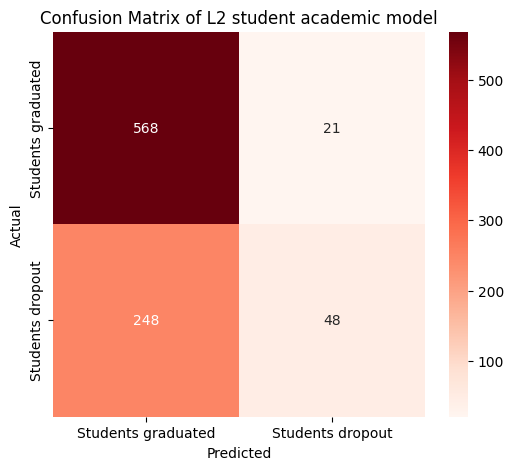

In [102]:
# Make predictions on the test set
y_pred_prob_l2 = l2_model.predict(X_test_Scaled)

# Convert probabilities to binary predictions (threshold > 0.5)
y_pred_l2 = (y_pred_prob_l2 > 0.3).astype(int)

# Confusion Matrix
conf_matrix_l2 = confusion_matrix(y_test, y_pred_l2)
print("Confusion Matrix:")
print(conf_matrix)

#Calculate additional metrics: Accuracy, Precision, Recall, F1 Score
accuracy = accuracy_score(y_test, y_pred_l2)
precision = precision_score(y_test, y_pred_l2)
recall = recall_score(y_test, y_pred_l2)
f1 = f1_score(y_test, y_pred_l2)

# Sensitivity and Specificity
sensitivity = recall  # Recall is the same as sensitivity for binary classification
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])  # TN / (TN + FP)

# Print the calculated metrics
print(f"\nL2 Model Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion Matrix Plot
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds',
            xticklabels=['Students graduated', 'Students dropout'], yticklabels=['Students graduated', 'Students dropout'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of L2 student academic model')
plt.show()

# Models Comparison:

**1. Vanilla Model:**

Test Loss: 1.6278

Test Accuracy: 0.6814

Accuracy: 0.6960 (highest among the models)

Precision: 0.6957

Recall (Sensitivity): 0.1622

Specificity: 0.9643

F1 Score: 0.2630


**2. L1 Model with Adam:**


Test Loss: 0.6013 (significantly lower than Vanilla)

Test Accuracy: 0.7311 (higher than Vanilla)

Accuracy: 0.5548

Precision: 0.4149

Recall (Sensitivity): 0.8074 (much higher recall)

Specificity: 0.9643 (same as Vanilla)

F1 Score: 0.5482 (higher than Vanilla)


**3. L2 Model with RMSProp:**


Test Loss: 0.5594 (lowest loss)

Test Accuracy: 0.7186 (higher than Vanilla)

Accuracy: 0.4734 (lower than Vanilla and L1)

Precision: 0.3803

Recall (Sensitivity): 0.9122 (highest recall)

Specificity: 0.9643 (same as Vanilla and L1)

F1 Score: 0.5368

## More Analysis:

**Test Accuracy:** L1 Model has the highest test accuracy at `0.7311,` followed by L2 at `0.7186`, both of which outperform the Vanilla model's `0.6814.`
Accuracy:

Vanilla Model has the highest accuracy at `0.6960,` followed by L1 at `0.5548,` and L2 trailing at `0.4734.`

**Precision:** Vanilla has the best precision at `0.6957,` meaning fewer false positives, while L1 and L2 perform lower in precision.

**Recall** (Sensitivity): Both L1 and L2 models drastically outperform the Vanilla model in terms of recall, with L2 achieving `0.9122` and L1 at `0.8074,` compared to Vanilla's `0.1622.`

**F1 Score:** L1 Regularization has the highest F1 Score of `0.5482,` indicating a good balance between precision and recall.

L2 follows with an F1 Score of `0.5368,` while Vanilla has the lowest F1 Score at `0.2630.`

# **Conclusion:**


`L1 Regularization with Adam` is overall better than the Vanilla model. It has the highest `test accuracy` and `F1 score,` making it a more balanced model despite a slightly lower accuracy compared to Vanilla.

L2 Regularization, though it has excellent `recall,` does not surpass the L1 model or Vanilla in terms of `accuracy` or `precision.`

Thus, `L1 Regularization` offers the best performance overall compared to the Vanilla model, especially considering its superior `test accuracy` and `F1 Score.`









                          ©2024 Mohamed Ahmed Yasin